# Capstone Project : Predicting Used Car Price and Used Car Recommender Model

---

## Problem Statement

The price of used cars has increased after the coronavirus pandemic due to the issue of supply chain. Making a decision to buy a car is a challenge. As a data scientist, we would like to help buyers and sellers on buying and selling their car. The purpose of this project is to build a model to predict the price of used cars and a recommender system. Those models will help sellers when they are planning to sell their car and buyers to have an idea when they are looking for a used car. 

## Data Import & Cleaning 

In [2]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# this data is from Kaggle and the data collected from craigslist. 

df = pd.read_csv('vehicles.csv')

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
# drop columns that not use to predict the price of car

df.drop(columns=['posting_date','long','lat','county','description','image_url','VIN','region_url','region','url','id'], inplace =True)

In [7]:
# row that have price = 0

df[df['price']==0].head(10)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
46,0,2011.0,jeep,compass,excellent,NaN,gas,99615.0,clean,automatic,NaN,full-size,SUV,NaN,al
126,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
191,0,2015.0,nissan,sentra,excellent,4 cylinders,gas,99505.0,clean,automatic,fwd,NaN,sedan,silver,al


In [8]:
df[df['price']==0]['price'].count()

32895

In [9]:
# 32895 value of the price are equal to 0 
# Drop all the sale price that equal to 0. 
# replace the 0 value of price with nan and drop the nan

df['price'].replace(0, np.nan, inplace = True)
df.dropna(subset=['price'],inplace=True)

In [10]:
df.shape

(393985, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393985 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         393985 non-null  float64
 1   year          392812 non-null  float64
 2   manufacturer  377800 non-null  object 
 3   model         389284 non-null  object 
 4   condition     242596 non-null  object 
 5   cylinders     233575 non-null  object 
 6   fuel          391391 non-null  object 
 7   odometer      391695 non-null  float64
 8   title_status  386251 non-null  object 
 9   transmission  392162 non-null  object 
 10  drive         273731 non-null  object 
 11  size          111052 non-null  object 
 12  type          308053 non-null  object 
 13  paint_color   276836 non-null  object 
 14  state         393985 non-null  object 
dtypes: float64(3), object(12)
memory usage: 48.1+ MB


In [12]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [13]:
# check the maximum number of price

df['price'].sort_values(ascending=False).head(10)

356716    3.736929e+09
318592    3.736929e+09
257840    3.024942e+09
91576     3.024942e+09
37410     3.009549e+09
184704    1.410065e+09
153082    1.234568e+09
29386     1.111111e+09
37409     1.111111e+09
122470    9.876543e+08
Name: price, dtype: float64

In [14]:
# set the limit for the sale price.
# only keep the price that less than 200000

df = df.loc[df['price']<200000]
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [15]:
df.shape

(393858, 15)

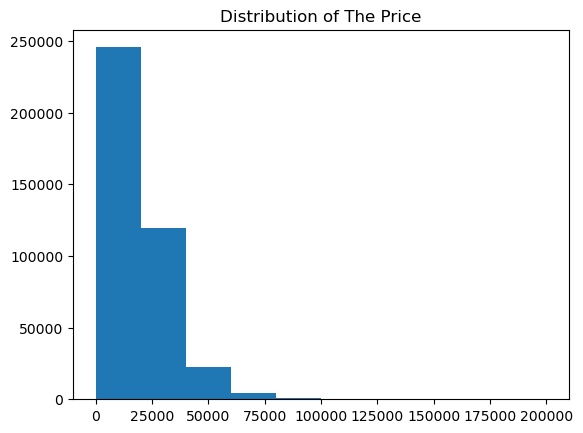

In [16]:
plt.hist(df['price'])
plt.title("Distribution of The Price");

In [17]:
# check NaN in all columns
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe

df[df.isna().any(axis=1)].head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [18]:
# drop row that most of columns are na 
# https://stackoverflow.com/questions/39128856/python-drop-row-if-two-columns-are-nan

df.dropna(subset=['manufacturer','model','cylinders','size'], how="all", inplace=True)

In [19]:
df.isnull().mean()

price           0.000000
year            0.002821
manufacturer    0.040846
model           0.011722
condition       0.384085
cylinders       0.407025
fuel            0.006430
odometer        0.005658
title_status    0.019482
transmission    0.004464
drive           0.305034
size            0.718100
type            0.217905
paint_color     0.297177
state           0.000000
dtype: float64

In [20]:
df.shape

(393796, 15)

In [21]:
# check if data have duplicate

df[df.duplicated()==True].head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
188,39590.0,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
221,33590.0,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
230,27990.0,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,NaN,pickup,black,al
251,29990.0,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,NaN,pickup,red,al
284,27990.0,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,NaN,NaN,pickup,red,al


In [22]:
# drop duplicate

df.drop_duplicates(inplace=True)

In [23]:
df.shape

(279055, 15)

In [24]:
# year vs price

df['year'].unique()

array([2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019., 2011.,
       1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003., 2008.,
       2007., 2005., 1966., 2009., 1998., 2002.,   nan, 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1991., 1972., 1988., 1994., 1929.,
       1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937., 1985.,
       1957., 1953., 1942., 1963., 1977., 1993., 1990., 1965., 1982.,
       1948., 1983., 1936., 1932., 1951., 1931., 1980., 1967., 1971.,
       1947., 1981., 1926., 1962., 1975., 1964., 1934., 1952., 1940.,
       1959., 1950., 1930., 1956., 1960., 1922., 1928., 2022., 1901.,
       1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935., 1918.,
       1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915., 1945.,
       1905., 1920., 1944., 1910., 1909.])

In [25]:
# rows that have missing year and price over 90000, 
# also missing manafacturer

df.loc[(df['year'].isna()) & (df['price']>90000)]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
11469,91900.0,NaN,NaN,SUPER DUTY F-350,NaN,8 cylinders,diesel,226.0,clean,automatic,4wd,NaN,pickup,grey,az
12093,97990.0,NaN,NaN,des-Benz AMG GT,NaN,8 cylinders,gas,18432.0,NaN,automatic,rwd,NaN,convertible,grey,az
31103,97995.0,NaN,NaN,olet Silverado 2500HD,NaN,8 cylinders,diesel,967.0,clean,automatic,4wd,NaN,pickup,black,ca
77256,91900.0,NaN,NaN,SUPER DUTY F-350,NaN,8 cylinders,diesel,226.0,clean,automatic,4wd,NaN,pickup,grey,co
100306,125900.0,NaN,NaN,500,NaN,8 cylinders,gas,69.0,clean,automatic,4wd,NaN,pickup,blue,fl
247013,91900.0,NaN,NaN,SUPER DUTY F-350,NaN,8 cylinders,diesel,226.0,clean,automatic,4wd,NaN,pickup,grey,nv
247332,97995.0,NaN,NaN,olet Silverado 2500HD,NaN,8 cylinders,diesel,967.0,clean,automatic,4wd,NaN,pickup,black,nv
249183,95900.0,NaN,NaN,SUPER DUTY F-350,NaN,8 cylinders,diesel,217.0,clean,automatic,4wd,NaN,pickup,silver,nv
362866,100000.0,NaN,NaN,Model 3,NaN,NaN,NaN,0.0,clean,automatic,rwd,NaN,sedan,NaN,tx
375695,97995.0,NaN,NaN,olet Silverado 2500HD,NaN,8 cylinders,diesel,967.0,clean,automatic,4wd,NaN,pickup,black,tx


In [78]:
df.groupby('year')['price'].agg(['count','mean'])
#sort_value('count', ascending = Flase).head()

,count,mean
year,,
1900.0,3,12917.000000
1905.0,1,3990.000000
1913.0,2,56000.000000
1915.0,1,5000.000000
1916.0,1,12000.000000
...,...,...
2018.0,21539,28906.422629
2019.0,14203,32816.242132
2020.0,10670,37574.640487


/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


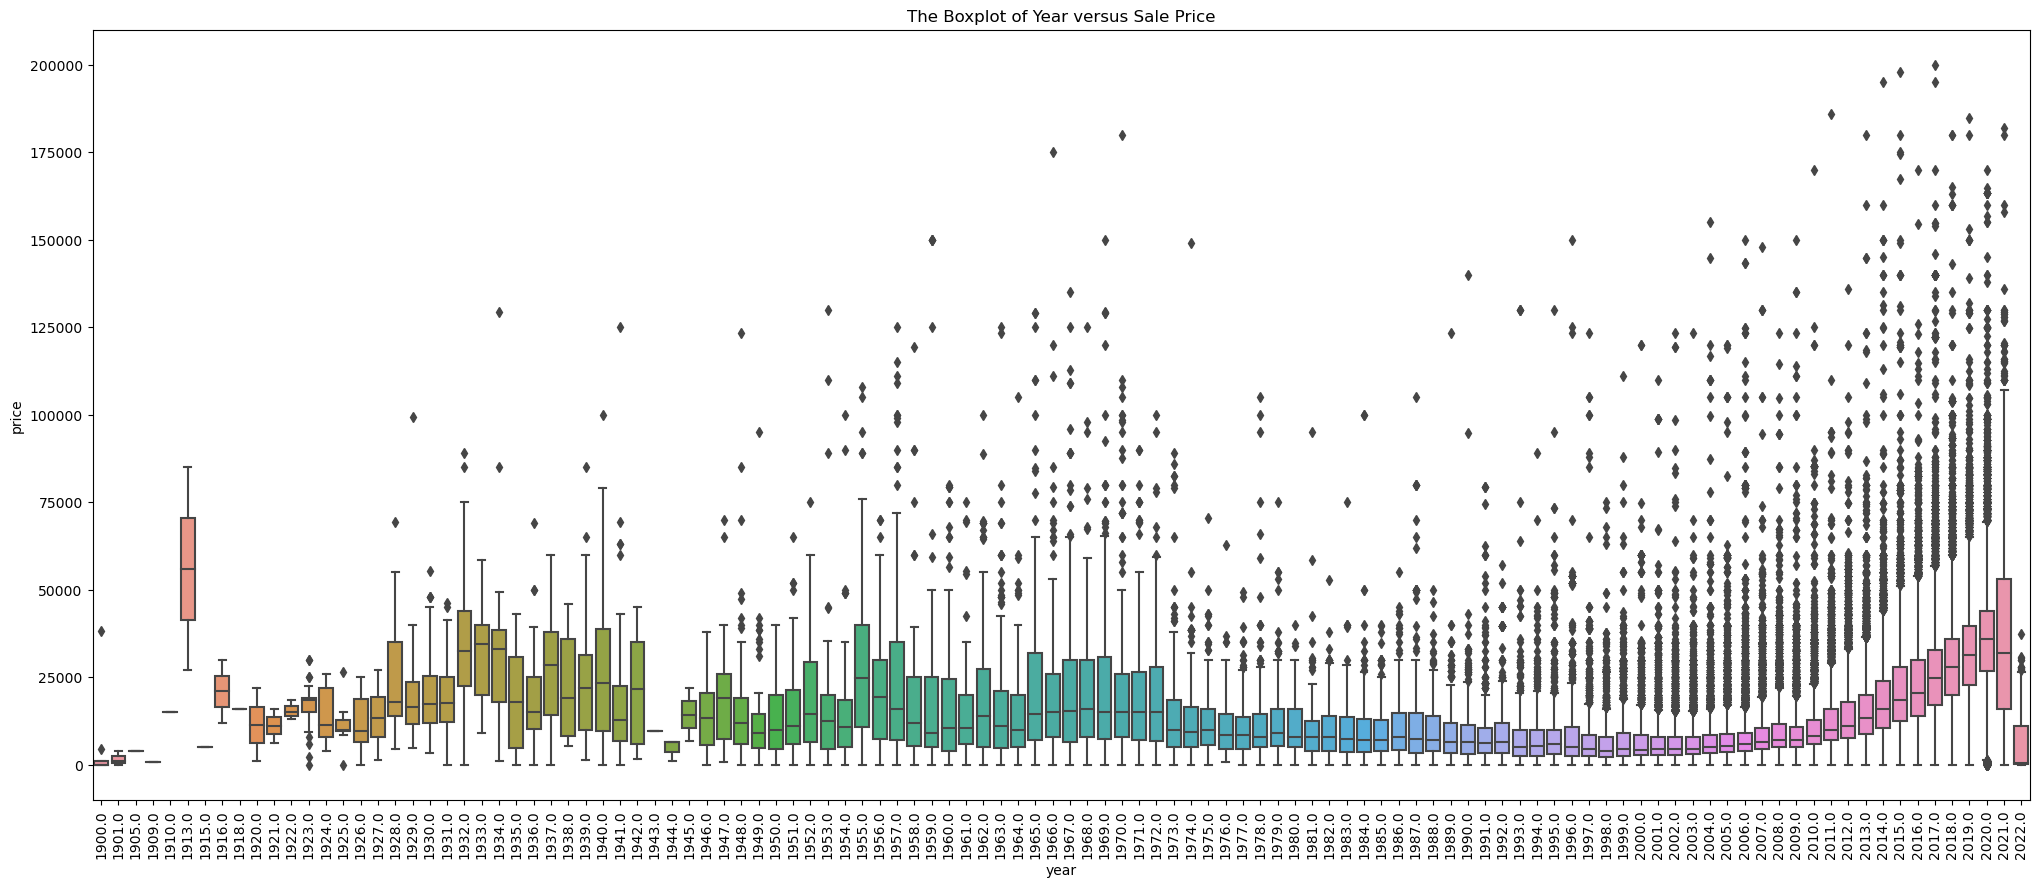

In [26]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='year', y='price')
plt.title("The Boxplot of Year versus Sale Price");

In [27]:
# older car have lower price

In [28]:
df.sort_values('price',ascending=False).head(10)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
93202,199999.0,2017.0,mercedes-benz,g-class,excellent,8 cylinders,gas,15189.0,clean,other,NaN,NaN,wagon,yellow,fl
92186,197999.0,2015.0,NaN,Lamborghini Huracan,excellent,10 cylinders,gas,33875.0,clean,other,NaN,mid-size,coupe,green,fl
201823,195000.0,2017.0,subaru,wrx,like new,4 cylinders,gas,73000.0,lien,manual,4wd,full-size,sedan,grey,mi
199310,195000.0,2014.0,cadillac,srx awd luxury,like new,NaN,gas,47814.0,clean,automatic,NaN,NaN,SUV,white,mi
409826,185886.0,2011.0,ferrari,458 italia,excellent,8 cylinders,gas,9964.0,clean,automatic,rwd,NaN,NaN,white,wa
359104,184950.0,2019.0,NaN,MCLAREN 570S,NaN,NaN,gas,9715.0,clean,NaN,NaN,NaN,coupe,silver,tn
113886,182000.0,2021.0,mercedes-benz,g550,new,NaN,gas,50.0,clean,automatic,NaN,NaN,NaN,grey,fl
182455,180000.0,2015.0,dodge,charger,excellent,8 cylinders,gas,120000.0,clean,automatic,NaN,NaN,NaN,NaN,md
277077,179999.0,2018.0,porsche,911,NaN,NaN,gas,11195.0,clean,automatic,rwd,NaN,coupe,silver,ny
277248,179999.0,2019.0,NaN,MCLAREN 570S,NaN,NaN,gas,8800.0,clean,automatic,NaN,NaN,coupe,green,ny


In [29]:
# manufacturer vs price 

df['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', nan, 'acura', 'hyundai', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari',
       'mini', 'pontiac', 'fiat', 'tesla', 'saturn', 'mercury',
       'harley-davidson', 'datsun', 'aston-martin', 'land rover',
       'morgan'], dtype=object)

In [30]:
df['manufacturer'].isnull().sum()

12290

In [31]:
df[df['manufacturer'].isna()].head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
97,15990.0,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,29652.0,clean,other,fwd,NaN,hatchback,blue,al
122,6800.0,2005.0,NaN,blue bird bus,excellent,6 cylinders,diesel,180000.0,clean,automatic,rwd,full-size,bus,yellow,al
135,14990.0,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,65203.0,clean,other,fwd,NaN,hatchback,red,al
137,2500.0,1966.0,NaN,1966 C-30 1 ton,good,6 cylinders,gas,47000.0,clean,manual,rwd,full-size,pickup,brown,al
155,8990.0,2013.0,NaN,smart fortwo Passion Hatchback,good,NaN,gas,59072.0,clean,automatic,rwd,NaN,coupe,silver,al


In [71]:
df.groupby('manufacturer')['price'].agg(['count','mean','median'])

,count,mean,median
manufacturer,,,
acura,3900,18909.207436,16990.0
alfa-romeo,524,28955.337786,28990.0
aston-martin,18,71001.555556,69470.0
audi,5087,23785.107726,22980.0
bmw,9322,19341.065437,16000.0
buick,3632,13844.465308,10995.0
cadillac,4632,19493.749136,15500.0
chevrolet,35422,18493.668201,14000.0
chrysler,4215,10246.073072,7500.0


/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


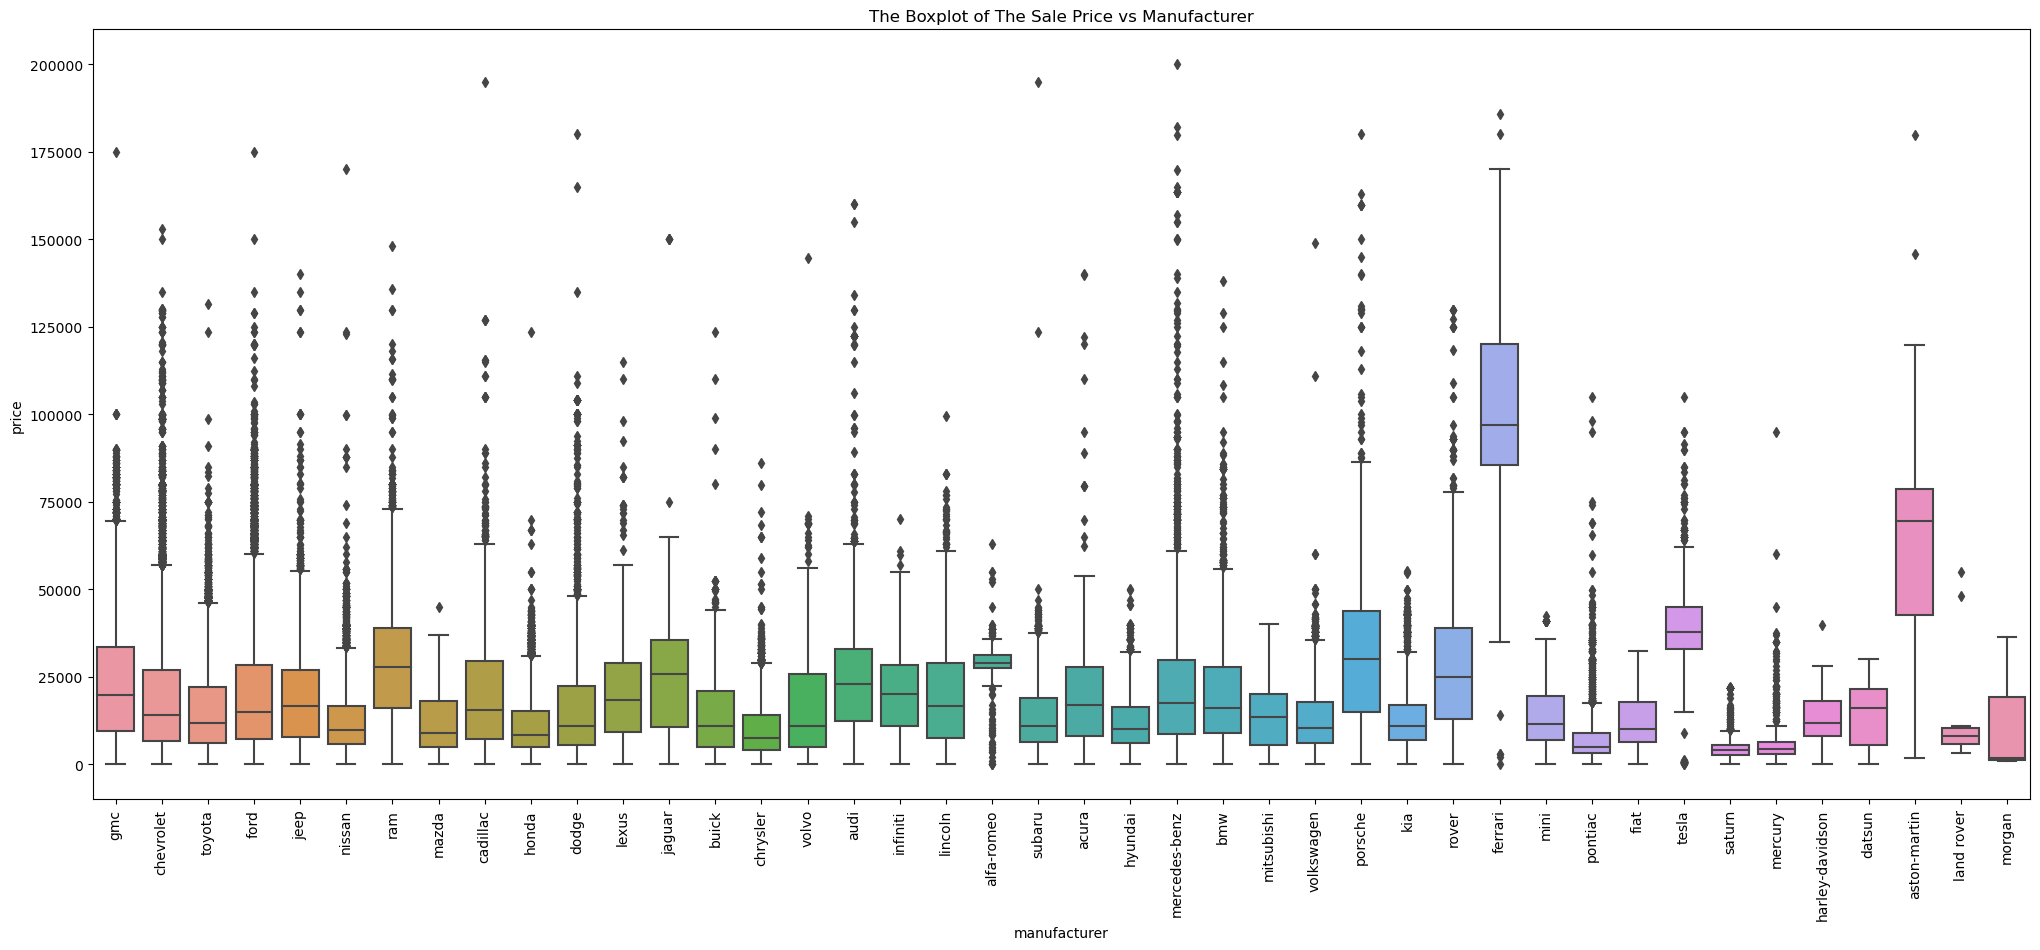

In [32]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='manufacturer', y='price')
plt.title("The Boxplot of The Sale Price vs Manufacturer");

In [33]:
# model vs price

df['model'].nunique()

28251

In [34]:
# there is a relationship between model and manufacturer

df_manufacturer = df.loc[df['manufacturer'].isna(),['manufacturer','model','year']]

In [35]:
df_manufacturer['model'].nunique()

5831

In [36]:
# drop the na of the manifacturer column and drop model column 
# model column would be an interesting column to include for future. 

df.dropna(subset='manufacturer', inplace=True)
df.drop(columns='model',inplace=True)

In [37]:
df.shape

(266765, 14)

In [38]:
# condition vs price

df['condition'].unique()

array(['good', 'excellent', 'fair', nan, 'like new', 'new', 'salvage'],
      dtype=object)

In [39]:
df.loc[(df['condition'].isna())&(df['price']<10000)]

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
187,4500.0,2008.0,ford,NaN,6 cylinders,gas,187016.0,clean,automatic,rwd,NaN,coupe,red,al
190,4299.0,2007.0,nissan,NaN,4 cylinders,gas,189321.0,clean,automatic,fwd,NaN,sedan,silver,al
207,3750.0,1997.0,ford,NaN,NaN,gas,150000.0,clean,automatic,NaN,NaN,NaN,NaN,al
208,2500.0,1976.0,chevrolet,NaN,NaN,gas,100.0,clean,automatic,NaN,NaN,NaN,NaN,al
210,1300.0,1969.0,mercedes-benz,NaN,NaN,gas,12774.0,clean,automatic,NaN,NaN,NaN,NaN,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426848,4277.0,2005.0,honda,NaN,NaN,gas,236787.0,clean,automatic,NaN,NaN,coupe,NaN,wy
426851,6577.0,2013.0,hyundai,NaN,NaN,gas,169396.0,clean,manual,NaN,NaN,sedan,blue,wy
426852,6977.0,2011.0,honda,NaN,NaN,gas,112396.0,clean,automatic,NaN,NaN,sedan,white,wy
426853,4977.0,2005.0,nissan,NaN,NaN,gas,154917.0,clean,automatic,NaN,NaN,sedan,NaN,wy


/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


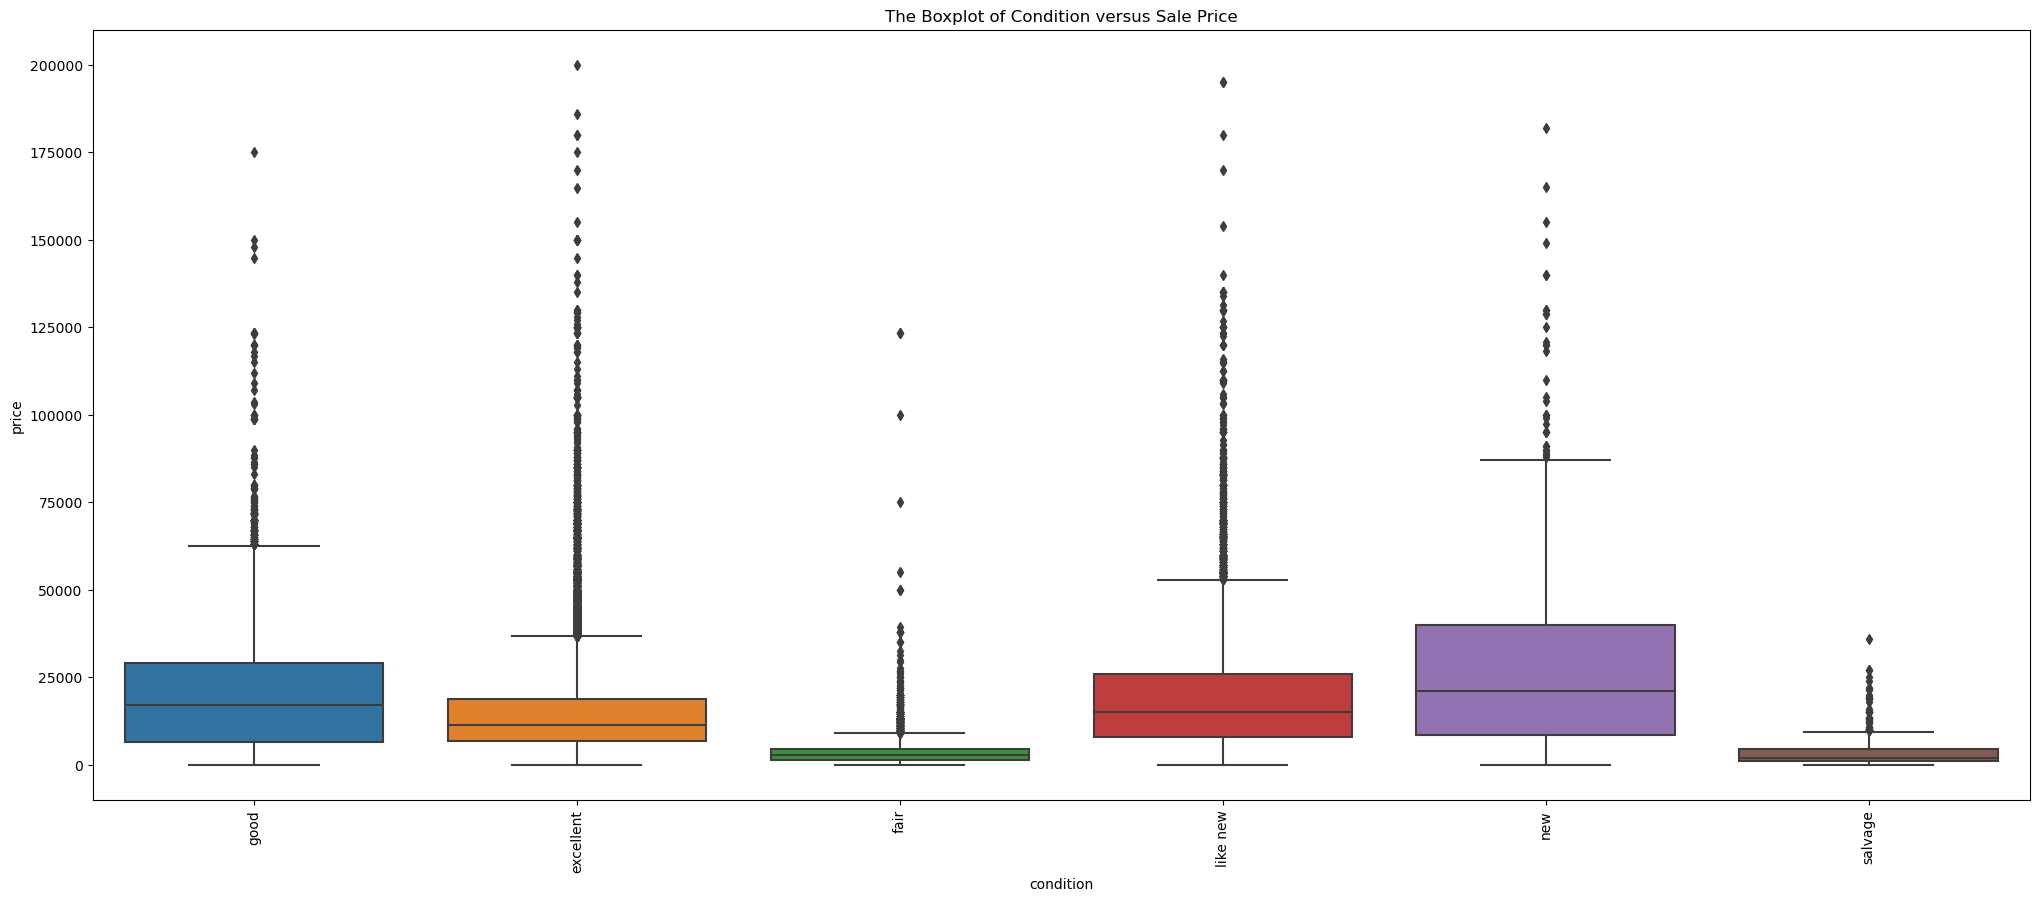

In [40]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='condition', y='price')
plt.title("The Boxplot of Condition versus Sale Price");

In [41]:
# cylinder vs price

df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


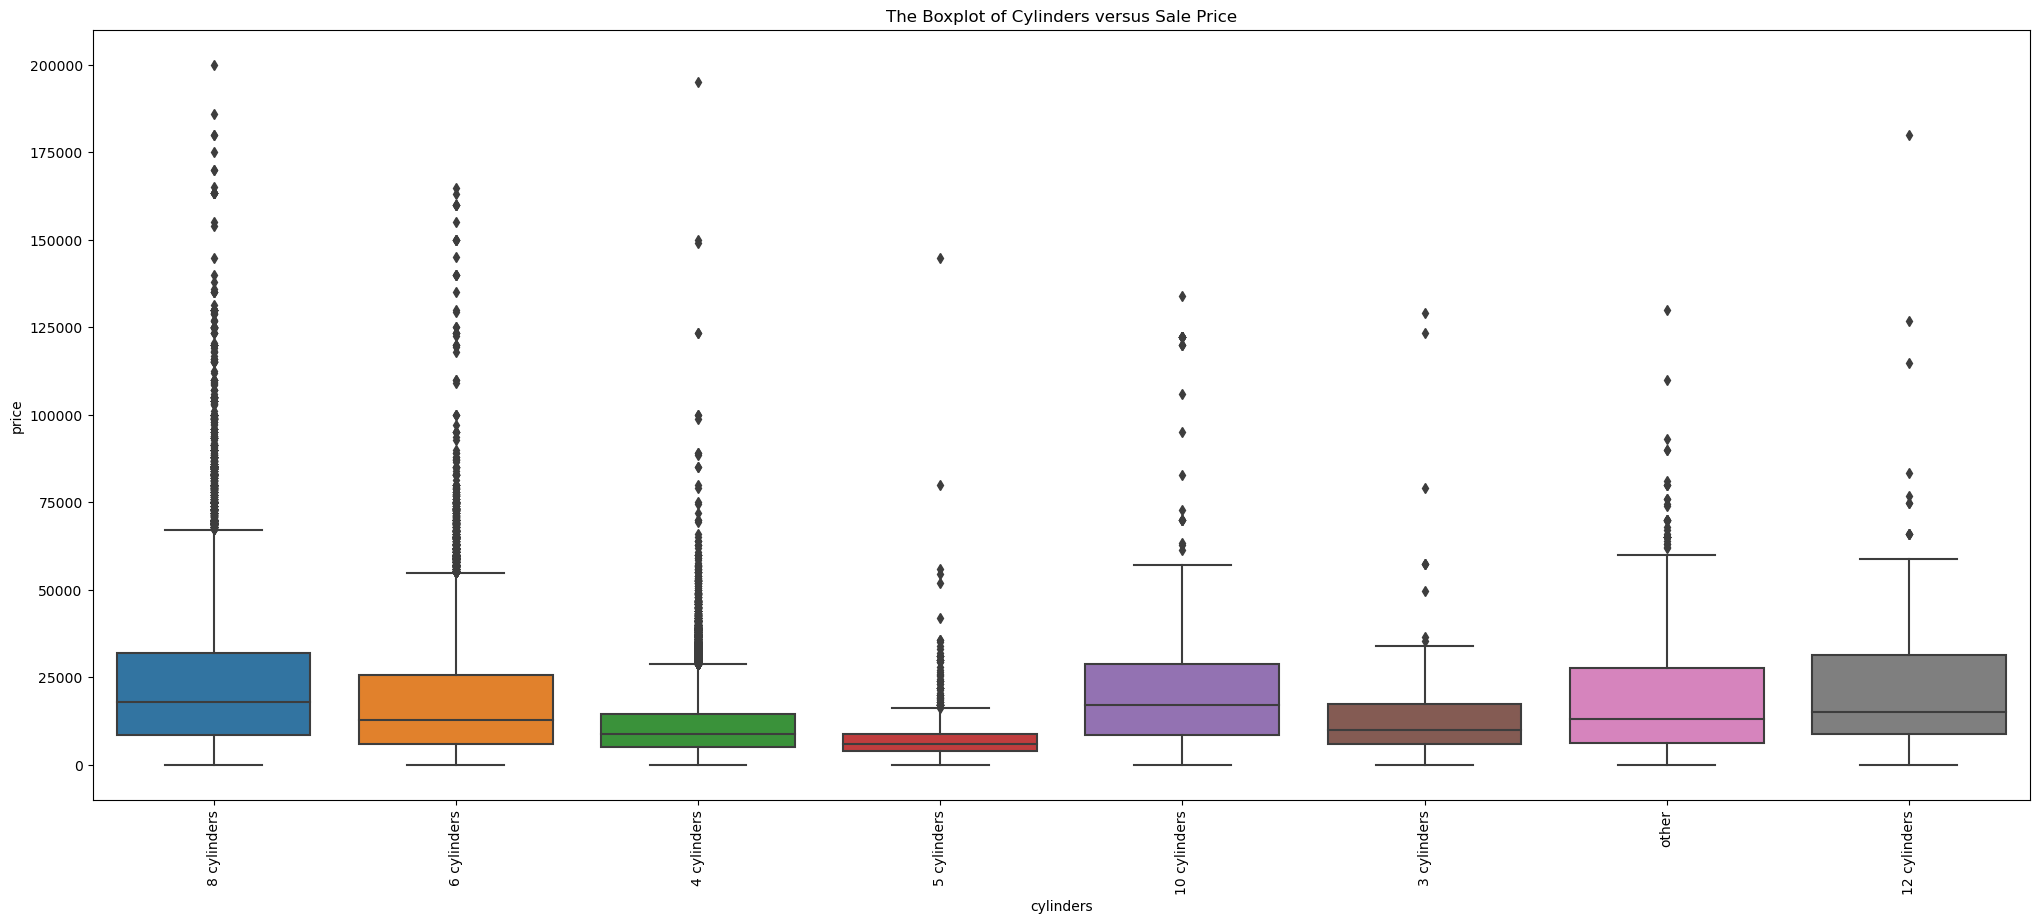

In [42]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='cylinders', y='price')
plt.title("The Boxplot of Cylinders versus Sale Price");

In [43]:
df['cylinders'].mode()

0    6 cylinders
Name: cylinders, dtype: object

In [44]:
# fuel vs Price

df['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


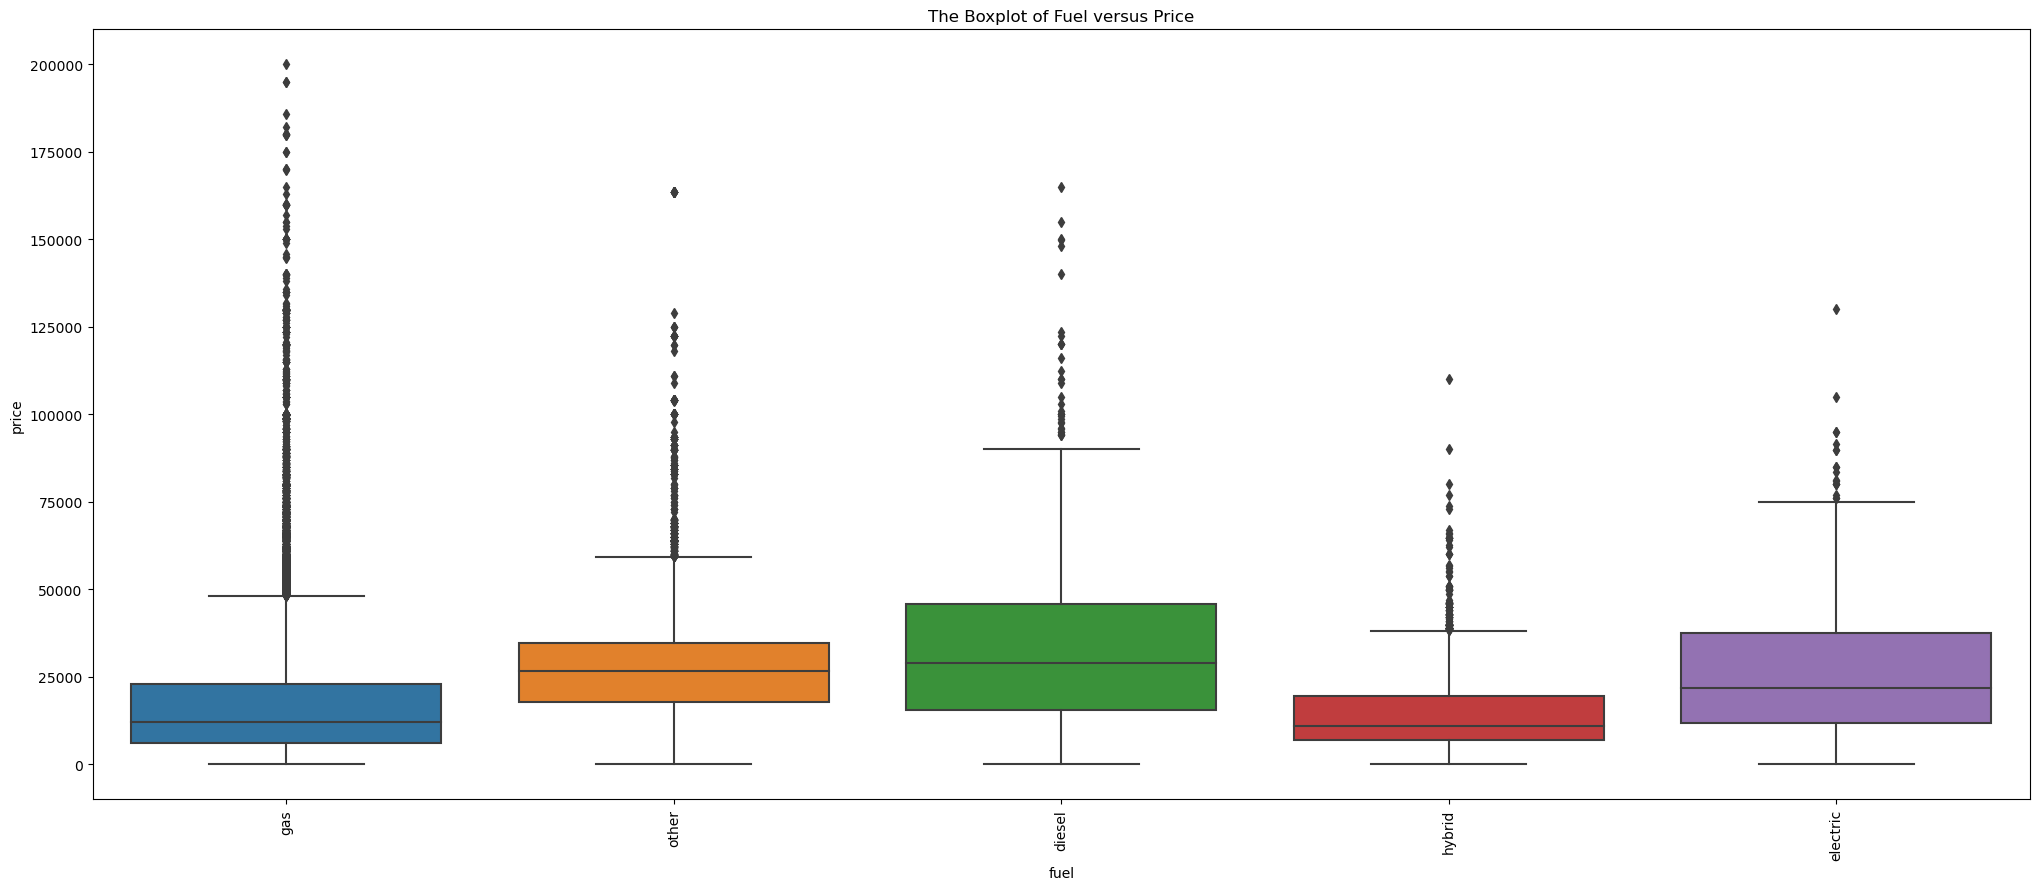

In [45]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='fuel', y='price')
plt.title("The Boxplot of Fuel versus Price");

In [46]:
df["fuel"].mode()

0    gas
Name: fuel, dtype: object

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


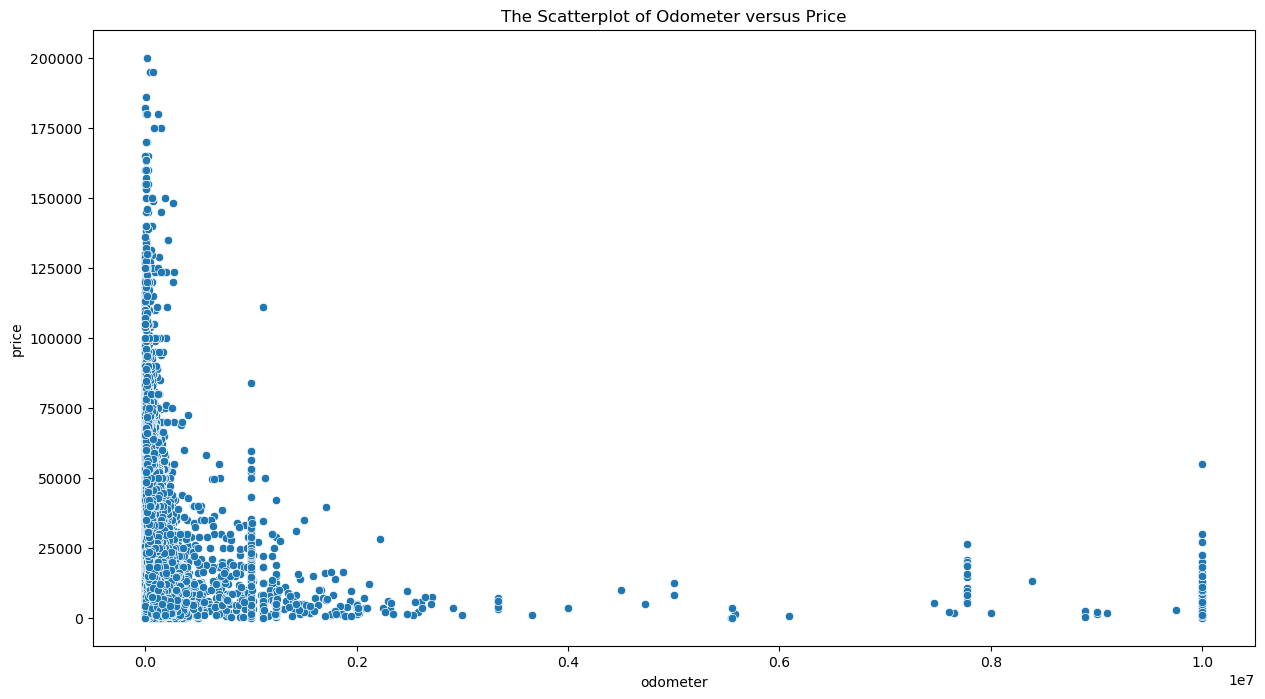

In [47]:
# odometer vs price

plt.figure(figsize=(15,8))
sns.scatterplot(df, x="odometer", y="price")
plt.title("The Scatterplot of Odometer versus Price");

In [48]:
df.shape

(266765, 14)

In [49]:
# title_status vs price

df['title_status'].unique()

array(['clean', 'rebuilt', 'lien', nan, 'salvage', 'missing',
       'parts only'], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


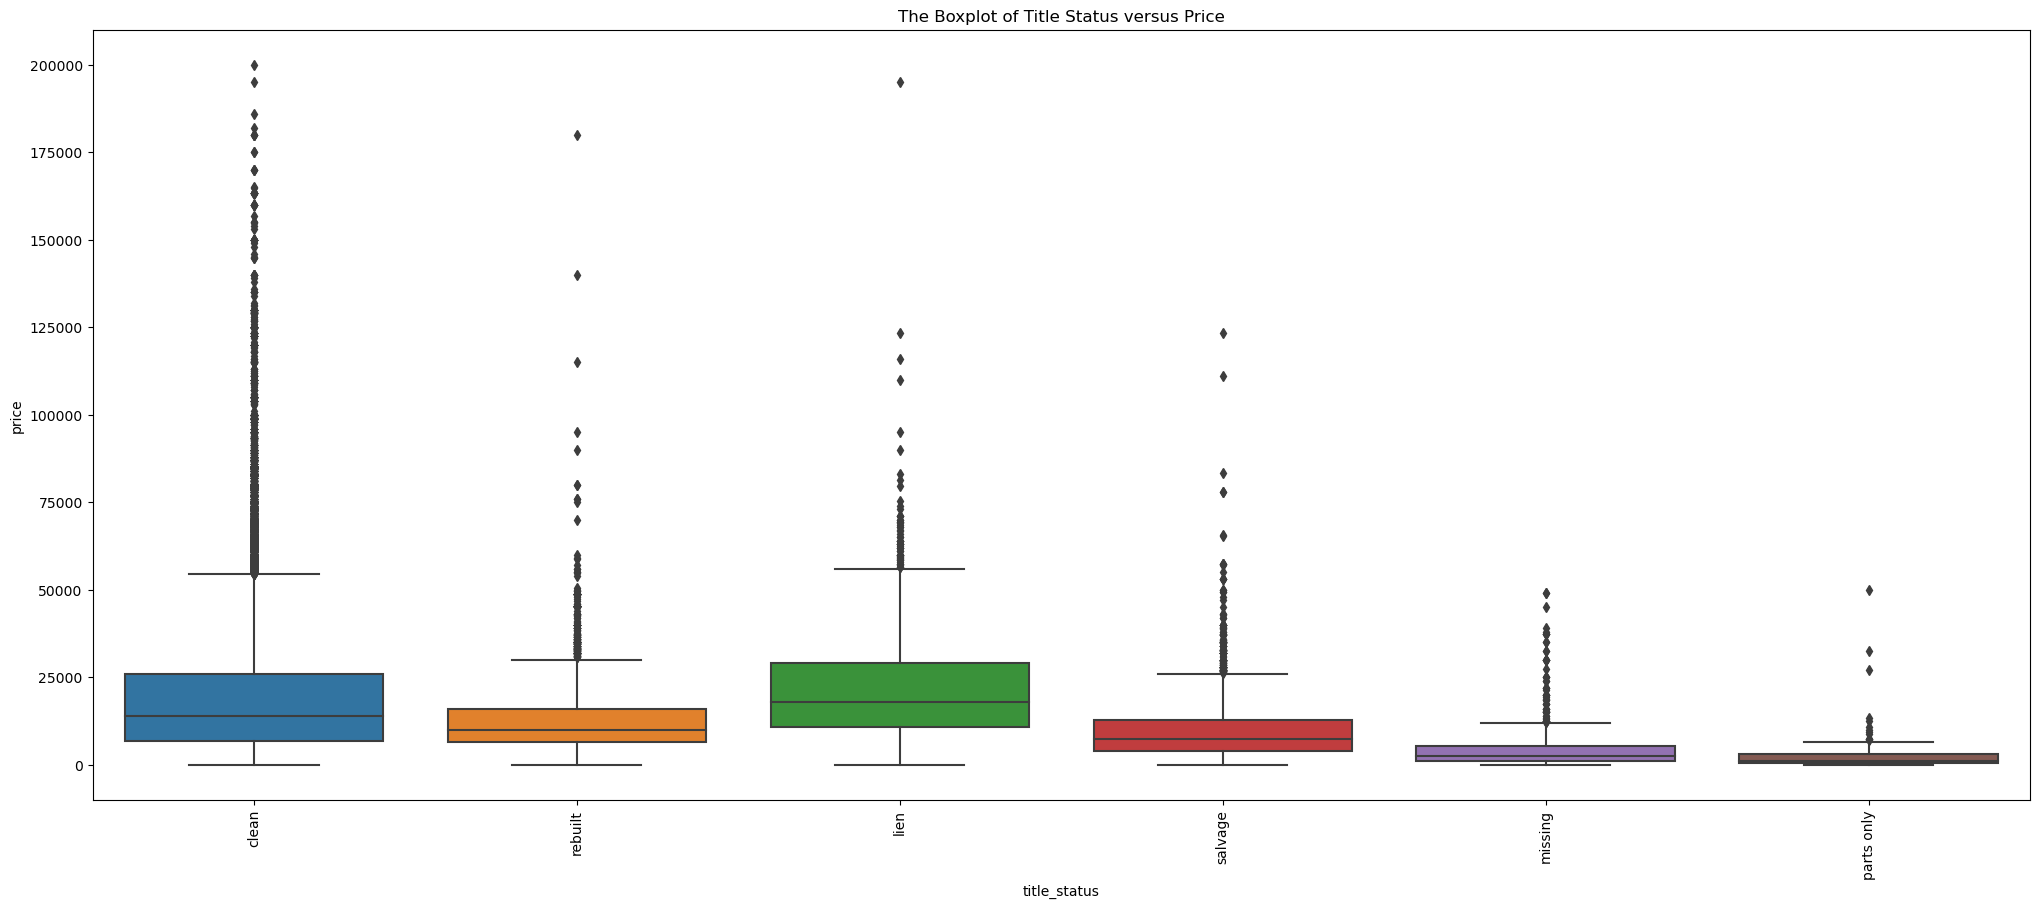

In [50]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='title_status', y='price')
plt.title("The Boxplot of Title Status versus Price");

In [51]:
# transmission vs price 

df['transmission'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


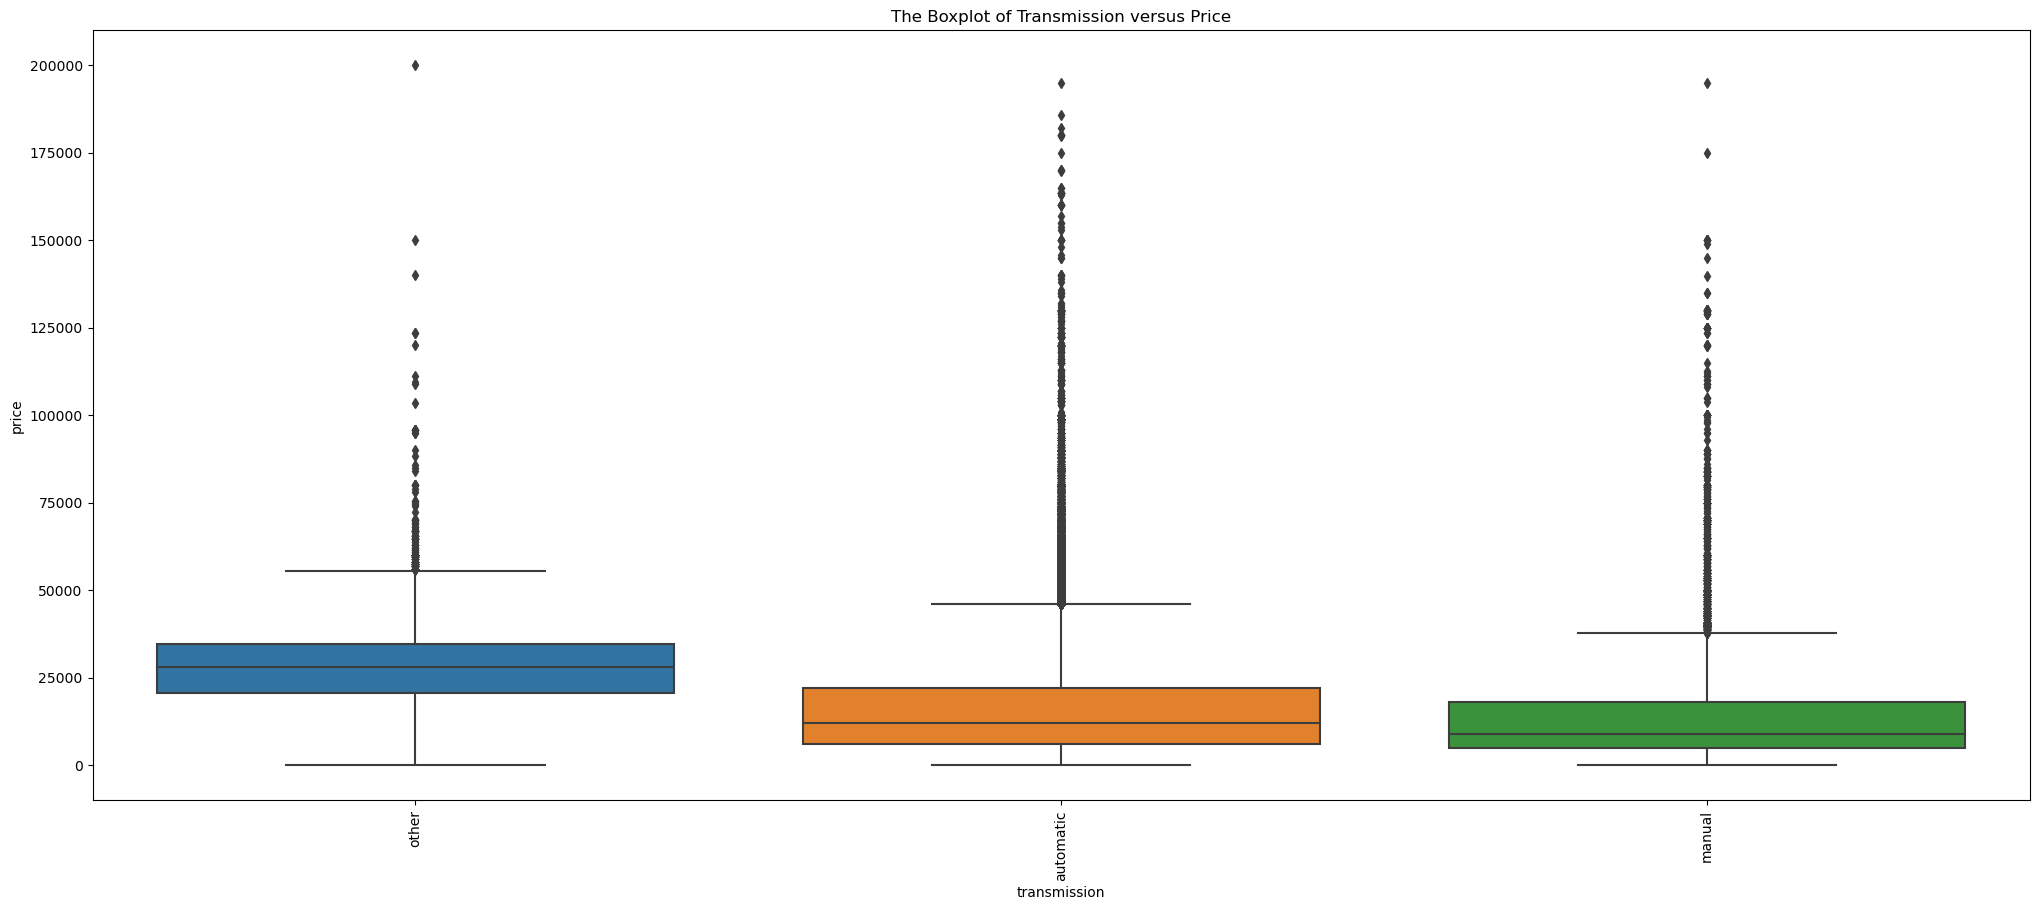

In [52]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='transmission', y='price')
plt.title("The Boxplot of Transmission versus Price");

In [53]:
# drive vs price

df['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


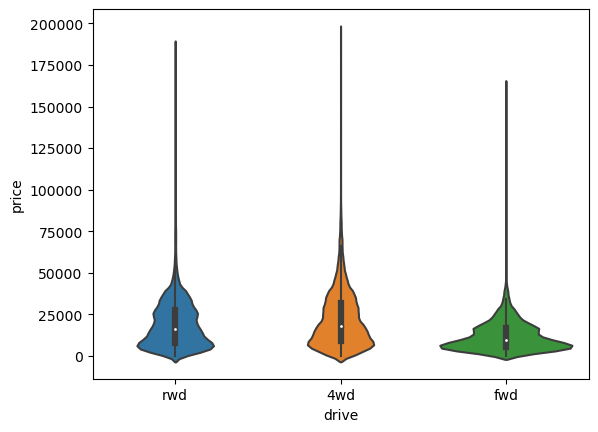

In [54]:
sns.violinplot(x=df["drive"], y =df["price"]);

In [55]:
df.isnull().mean()

price           0.000000
year            0.000011
manufacturer    0.000000
condition       0.361614
cylinders       0.376815
fuel            0.005001
odometer        0.004742
title_status    0.015208
transmission    0.004228
drive           0.288066
size            0.680618
type            0.225194
paint_color     0.283920
state           0.000000
dtype: float64

In [56]:
df['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


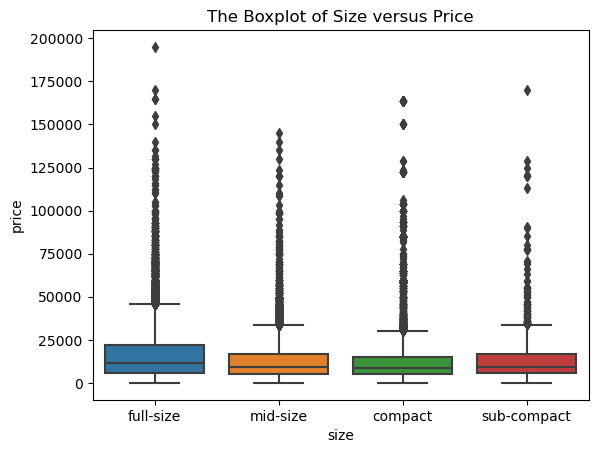

In [79]:
sns.boxplot(df, x='size', y='price')
plt.title("The Boxplot of Size versus Price");

In [58]:
df['type'].unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van',
       'bus'], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


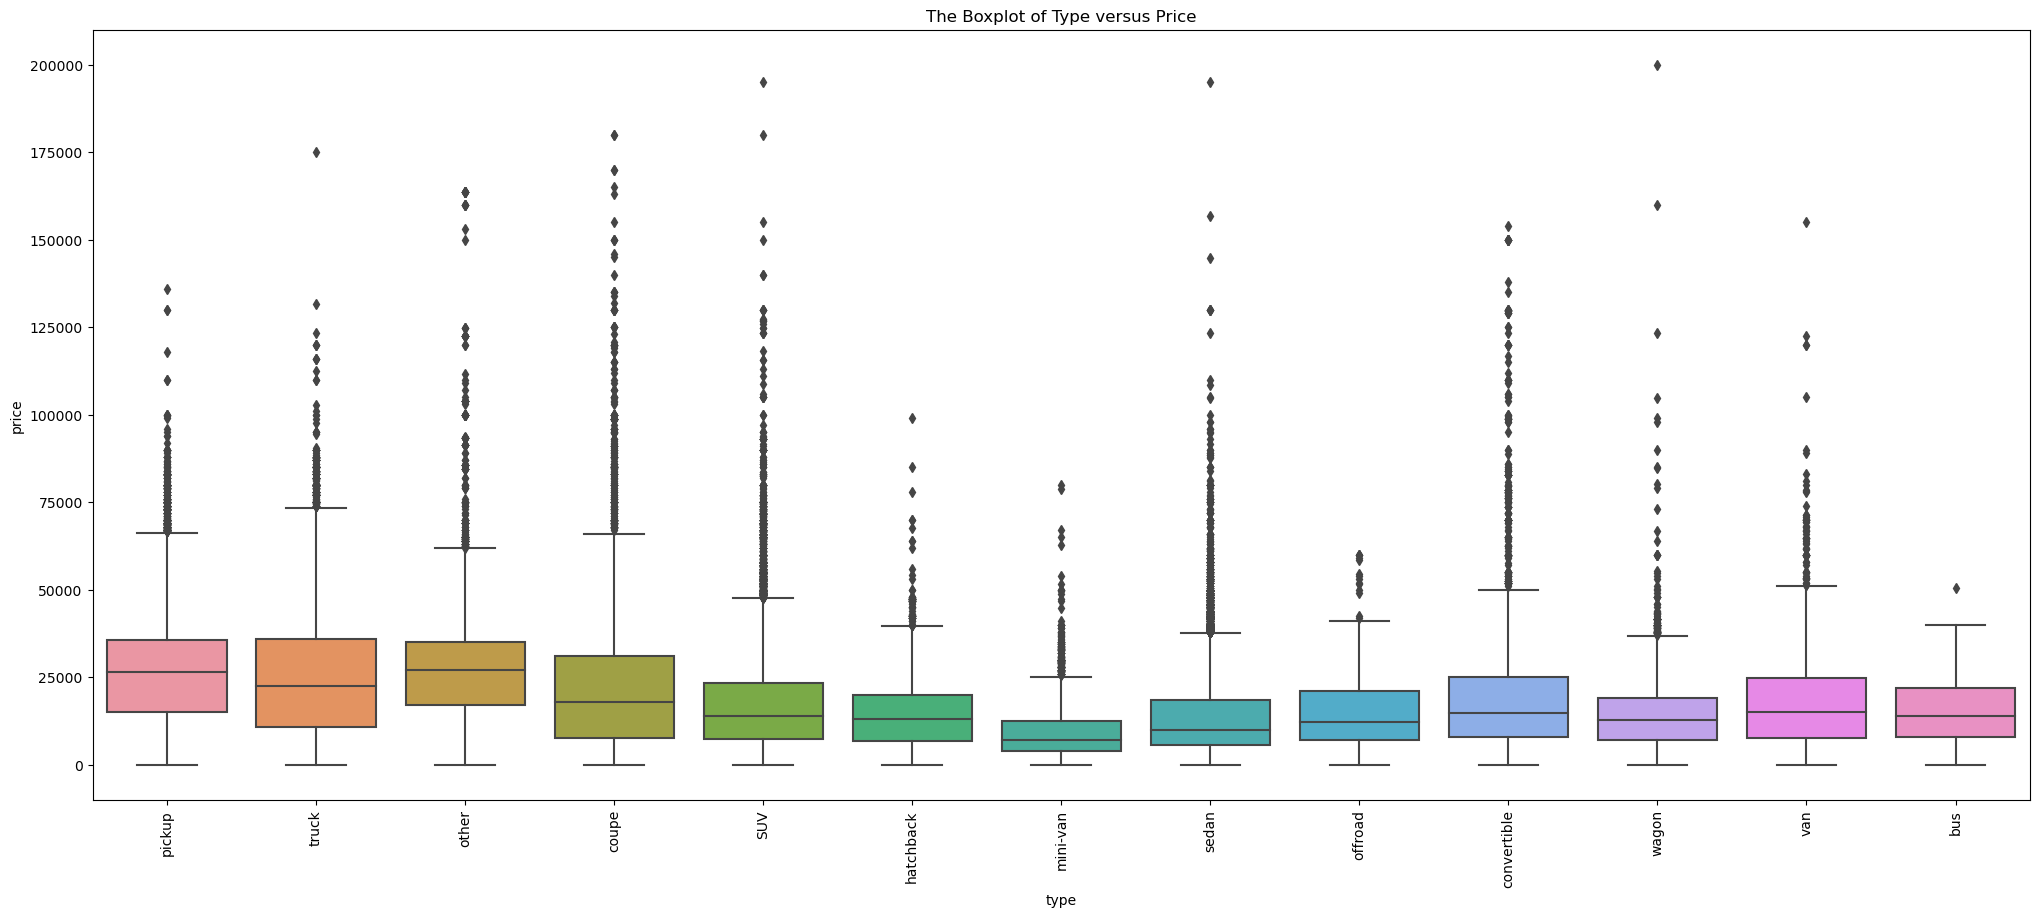

In [59]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='type', y='price')
plt.title("The Boxplot of Type versus Price");

In [60]:
df['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', nan, 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


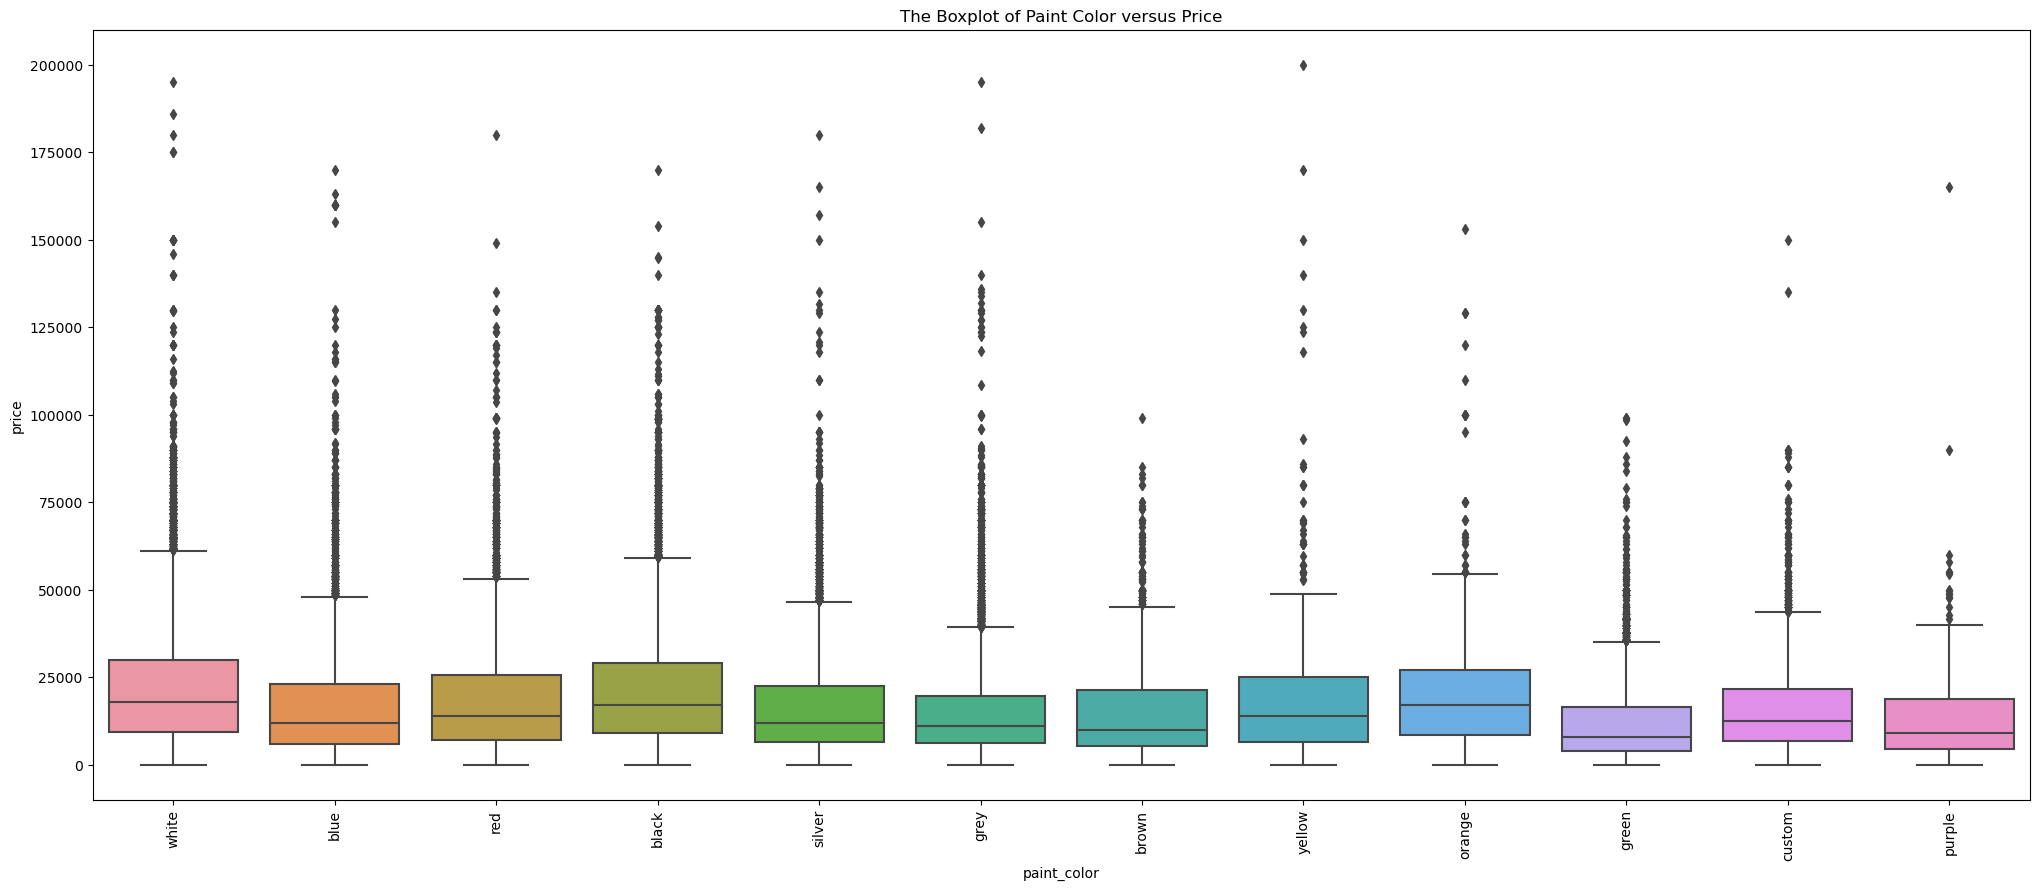

In [61]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='paint_color', y='price')
plt.title('The Boxplot of Paint Color versus Price');

In [62]:
df['paint_color'].mode()

0    white
Name: paint_color, dtype: object

/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/trangkhong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


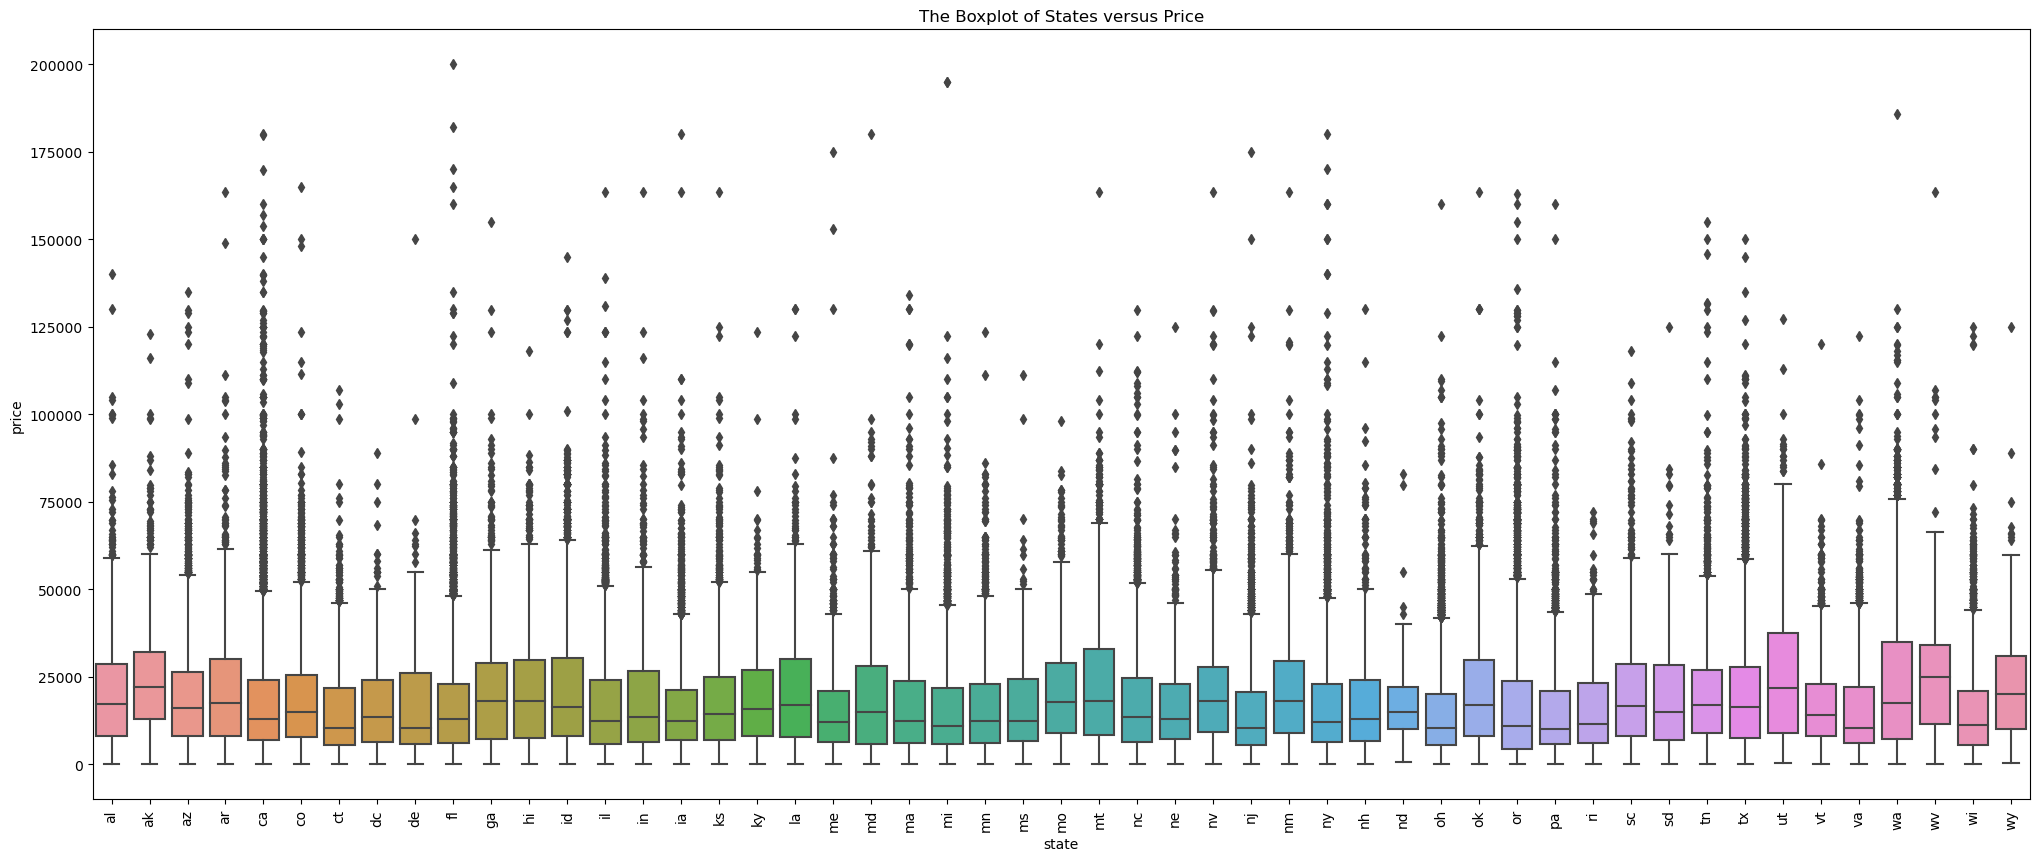

In [63]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.boxplot(df, x='state', y='price')
plt.title("The Boxplot of States versus Price");

In [64]:
df.isnull().sum()

price                0
year                 3
manufacturer         0
condition        96466
cylinders       100521
fuel              1334
odometer          1265
title_status      4057
transmission      1128
drive            76846
size            181565
type             60074
paint_color      75740
state                0
dtype: int64

In [64]:
df.shape

(266765, 14)

In [65]:
#look at the missing value of year 

df[df['year'].isna()]

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
2746,71989.0,NaN,rover,NaN,6 cylinders,gas,41865.0,clean,automatic,4wd,NaN,SUV,grey,al
250813,34888.0,NaN,rover,NaN,4 cylinders,gas,40418.0,clean,automatic,4wd,NaN,SUV,black,nj
359095,71989.0,NaN,rover,NaN,6 cylinders,gas,41865.0,clean,automatic,4wd,NaN,SUV,grey,tn


In [ ]:
# EDA

In [67]:
# save the dataframe after cleaning to imputing

df.to_csv('df_imputing.csv', index=False)

In [65]:
# divide dataframe into 3 part base on the price 
# to compare the relationship between price and feature

In [80]:
df_1 = df.loc[df['price']<=15000]

In [67]:
df_2 = df.loc[(df['price']>15000)&(df['price']<=50000)]

In [68]:
df_3 = df.loc[df['price']>50000]

In [69]:
df_1.isnull().sum()

price               0
year                0
manufacturer        0
condition       49590
cylinders       44921
fuel              569
odometer          768
title_status     2503
transmission      544
drive           42314
size            87626
type            39901
paint_color     45273
state               0
dtype: int64

In [70]:
df_1['condition'].mode()

0    excellent
Name: condition, dtype: object

In [71]:
df_1['condition'].value_counts()

excellent    44429
good         36226
like new      7987
fair          5848
salvage        511
new            328
Name: condition, dtype: int64

In [82]:
df_1['condition'].fillna(df_1['condition'].mode()[0])

31        excellent
37        excellent
59        excellent
73        excellent
86             good
            ...    
426848    excellent
426851    excellent
426852    excellent
426853    excellent
426855    excellent
Name: condition, Length: 144919, dtype: object

In [73]:
df_1['cylinders'].mode()

0    4 cylinders
Name: cylinders, dtype: object

In [83]:
df_1['cylinders'].fillna(df_1['cylinders'].mode()[0])

31        6 cylinders
37        6 cylinders
59        6 cylinders
73        8 cylinders
86        6 cylinders
             ...     
426848    4 cylinders
426851    4 cylinders
426852    4 cylinders
426853    4 cylinders
426855    4 cylinders
Name: cylinders, Length: 144919, dtype: object

In [75]:
df_1['fuel'].mode()

0    gas
Name: fuel, dtype: object

In [76]:
df_1['odometer'].median()

125584.0

In [77]:
df_1['odometer'].mean()

137199.6853785267

In [84]:
df_1['odometer'].fillna(df_1['odometer'].mean())

31        128000.0
37        192000.0
59         95000.0
73         90000.0
86        176144.0
            ...   
426848    236787.0
426851    169396.0
426852    112396.0
426853    154917.0
426855     64267.0
Name: odometer, Length: 144919, dtype: float64

In [91]:
df_1['title_status'].mode()

0    clean
Name: title_status, dtype: object

In [92]:
df_1['transmission'].mode()

0    automatic
Name: transmission, dtype: object

In [96]:
df_1['drive'].mode()

0    fwd
Name: drive, dtype: object

In [85]:
df_1['drive'].fillna(df_1['drive'].mode()[0])

31        rwd
37        4wd
59        fwd
73        rwd
86        fwd
         ... 
426848    fwd
426851    fwd
426852    fwd
426853    fwd
426855    fwd
Name: drive, Length: 144919, dtype: object

In [102]:
df_1['size'].mode()

0    full-size
Name: size, dtype: object

In [89]:
df_1['type'].mode()

0    sedan
Name: type, dtype: object

In [89]:
df_1['type'].fillna(df_1['type'].mode()[0])

31            truck
37            sedan
59         mini-van
73            sedan
86         mini-van
            ...    
426848        coupe
426851        sedan
426852        sedan
426853        sedan
426855    hatchback
Name: type, Length: 144919, dtype: object

In [92]:
df_1['paint_color'].mode()

0    white
Name: paint_color, dtype: object

In [87]:
df_1.isnull().sum()

price               0
year                0
manufacturer        0
condition           0
cylinders       44921
fuel              569
odometer          768
title_status     2503
transmission      544
drive           42314
size            87626
type            39901
paint_color     45273
state               0
dtype: int64

In [121]:
df_2.isnull().sum()

price                0
year                 1
manufacturer         0
condition        66566
cylinders        83693
fuel              1155
odometer           811
title_status      2456
transmission       755
drive            53679
size            143248
type             26712
paint_color      45850
state                0
dtype: int64

In [75]:
df_2['condition'].mode()

0    good
Name: condition, dtype: object

In [97]:
df_2['condition'] = df_2['condition'].fillna(df_2['condition'].mode()[0])

/var/folders/mh/_rcy82jn02986q7q47fnf2mc0000gn/T/ipykernel_3089/3923074604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['condition'] = df_2['condition'].fillna(df_2['condition'].mode()[0])


In [80]:
df_2['cylinders'].mode()

0    6 cylinders
Name: cylinders, dtype: object

In [98]:
df_2['cylinders'] = df_2['cylinders'].fillna(df_2['cylinders'].mode()[0])

/var/folders/mh/_rcy82jn02986q7q47fnf2mc0000gn/T/ipykernel_3089/2793919864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['cylinders'] = df_2['cylinders'].fillna(df_2['cylinders'].mode()[0])


In [84]:
df_2['fuel'].mode()

0    gas
Name: fuel, dtype: object

In [100]:
df_2['odometer'].mean()

63606.08188878042

In [104]:
df_2['odometer'] = df_2['odometer'].fillna(df_2['odometer'].mean())

/var/folders/mh/_rcy82jn02986q7q47fnf2mc0000gn/T/ipykernel_3089/3845269986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['odometer'] = df_2['odometer'].fillna(df_2['odometer'].mean())


In [93]:
df_2['transmission'].mode()

0    automatic
Name: transmission, dtype: object

In [97]:
df_2['drive'].mode()

0    4wd
Name: drive, dtype: object

In [100]:
df_2['drive'] = df_2['drive'].fillna(df_2['drive'].mode()[0])

/var/folders/mh/_rcy82jn02986q7q47fnf2mc0000gn/T/ipykernel_3089/1293368597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['drive'] = df_2['drive'].fillna(df_2['drive'].mode()[0])


In [103]:
df_2['size'].mode()

0    full-size
Name: size, dtype: object

In [106]:
df_2['type'].mode()

0    SUV
Name: type, dtype: object

In [101]:
df_2['type'] = df_2['type'].fillna(df_2['type'].mode()[0])

/var/folders/mh/_rcy82jn02986q7q47fnf2mc0000gn/T/ipykernel_3089/4128111979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['type'] = df_2['type'].fillna(df_2['type'].mode()[0])


In [96]:
df_2['paint_color'].mode()

0    white
Name: paint_color, dtype: object

In [118]:
df_3.isnull().sum()

price              0
year               2
manufacturer       0
condition          0
cylinders          0
fuel              40
odometer           0
title_status     114
transmission      63
drive              0
size            6121
type               0
paint_color     2368
state              0
dtype: int64

In [76]:
df_3['condition'].mode()

0    excellent
Name: condition, dtype: object

In [102]:
df_3['condition'] = df_3['condition'].fillna(df_3['condition'].mode()[0])

/var/folders/mh/_rcy82jn02986q7q47fnf2mc0000gn/T/ipykernel_3089/2594699264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['condition'] = df_3['condition'].fillna(df_3['condition'].mode()[0])


In [81]:
df_3['cylinders'].mode()

0    8 cylinders
Name: cylinders, dtype: object

In [103]:
df_3['cylinders'] = df_3['cylinders'].fillna(df_3['cylinders'].mode()[0])

/var/folders/mh/_rcy82jn02986q7q47fnf2mc0000gn/T/ipykernel_3089/1231990689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['cylinders'] = df_3['cylinders'].fillna(df_3['cylinders'].mode()[0])


In [85]:
df_3['fuel'].mode()

0    gas
Name: fuel, dtype: object

In [101]:
df_3['odometer'].mean()

37953.78982474496

In [106]:
df_3['odometer'] = df_3['odometer'].fillna(df_3['odometer'].mean())

/var/folders/mh/_rcy82jn02986q7q47fnf2mc0000gn/T/ipykernel_3089/935235528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['odometer'] = df_3['odometer'].fillna(df_3['odometer'].mean())


In [94]:
df_3['transmission'].mode()

0    automatic
Name: transmission, dtype: object

In [98]:
df_3['drive'].mode()

0    4wd
Name: drive, dtype: object

In [107]:
df_3['drive'] = df_3['drive'].fillna(df_3['drive'].mode()[0])

/var/folders/mh/_rcy82jn02986q7q47fnf2mc0000gn/T/ipykernel_3089/3993517813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['drive'] = df_3['drive'].fillna(df_3['drive'].mode()[0])


In [104]:
df_3['size'].mode()

0    full-size
Name: size, dtype: object

In [107]:
df_3['type'].mode()

0    truck
Name: type, dtype: object

In [108]:
df_3['type'] = df_3['type'].fillna(df_3['type'].mode()[0])

/var/folders/mh/_rcy82jn02986q7q47fnf2mc0000gn/T/ipykernel_3089/1151827621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['type'] = df_3['type'].fillna(df_3['type'].mode()[0])


In [95]:
df_3['paint_color'].mode()

0    white
Name: paint_color, dtype: object

In [ ]:
# compare with df 

In [77]:
df['condition'].mode()

0    good
Name: condition, dtype: object

In [82]:
df['cylinders'].mode()

0    6 cylinders
Name: cylinders, dtype: object

In [109]:
df['odometer'].mean()

102824.36479472693

In [90]:
df['title_status'].mode()

0    clean
Name: title_status, dtype: object

In [99]:
df['drive'].mode()

0    4wd
Name: drive, dtype: object

In [108]:
df['type'].mode()

0    sedan
Name: type, dtype: object

In [109]:
# concat three dataframe 

df = pd.concat([df_1,df_2,df_3], ignore_index=True, sort = False)

In [111]:
df.shape

(266765, 14)

In [113]:
df_1.shape

(144919, 14)

In [114]:
df.isnull().sum()

price                0
year                 3
manufacturer         0
condition            0
cylinders            0
fuel              1334
odometer             0
title_status      4057
transmission      1128
drive                0
size            181565
type                 0
paint_color      75740
state                0
dtype: int64

In [116]:
## Fill Missing Values
for col in list(df.select_dtypes('object').columns.values):
    df[col] = df[col].fillna(df[col].mode()[0])

In [117]:
df.isnull().sum()

price           0
year            3
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [121]:
df.dropna(inplace=True)

In [122]:
df.isnull().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [123]:
df.to_csv('df_modeling.csv')